# CHALLENGE 1

In [1]:
import pandas as pd
import numpy as np

In [2]:
pokemon = pd.read_csv('pokemon.csv')

### Print first 10 rows

In [3]:
pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [4]:
pokemon.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

##### To make coding easier for the rest, I clean the column headers

In [5]:
pokemon.columns = [colname.lower().replace(' ','_') for colname in pokemon.columns]
pokemon.columns = [colname.replace('.','') for colname in pokemon.columns]
display(pokemon.columns)

Index(['#', 'name', 'type_1', 'type_2', 'total', 'hp', 'attack', 'defense',
       'sp_atk', 'sp_def', 'speed', 'generation', 'legendary'],
      dtype='object')

### Obtain the distinct values across Type 1 and Type 2

In [6]:
type1_unique = list(pokemon['type_1'].unique())
display(type1_unique)

['Grass',
 'Fire',
 'Water',
 'Bug',
 'Normal',
 'Poison',
 'Electric',
 'Ground',
 'Fairy',
 'Fighting',
 'Psychic',
 'Rock',
 'Ghost',
 'Ice',
 'Dragon',
 'Dark',
 'Steel',
 'Flying']

In [7]:
type2_unique = list(pokemon['type_2'].unique())
display(type2_unique)

['Poison',
 nan,
 'Flying',
 'Dragon',
 'Ground',
 'Fairy',
 'Grass',
 'Fighting',
 'Psychic',
 'Steel',
 'Ice',
 'Rock',
 'Dark',
 'Water',
 'Electric',
 'Fire',
 'Ghost',
 'Bug',
 'Normal']

### Then create an array containing the distinct values across both fields

In [8]:
pokemon_types = type1_unique + type2_unique
pokemon_types = list(dict.fromkeys(pokemon_types))  # code found here https://www.w3schools.com/python/python_howto_remove_duplicates.asp
display(pokemon_types)

['Grass',
 'Fire',
 'Water',
 'Bug',
 'Normal',
 'Poison',
 'Electric',
 'Ground',
 'Fairy',
 'Fighting',
 'Psychic',
 'Rock',
 'Ghost',
 'Ice',
 'Dragon',
 'Dark',
 'Steel',
 'Flying',
 nan]

### Cleanup Name that contain "Mega".

In [9]:
def mega_cleanup(x):
    mega_index = x.find('Mega')
    if mega_index == -1:
        return x
    else:
        return x[mega_index-len(x):]

test_text = 'Megaavontuur'
test_text_2 = 'textMegaavontuur'
print(mega_cleanup(test_text))
print(mega_cleanup(test_text_2))

Megaavontuur
Megaavontuur


In [10]:
pokemon['name'] = pokemon['name'].apply(mega_cleanup)

In [11]:
pokemon.head(10)

,#,name,type_1,type_2,total,hp,attack,defense,sp_atk,sp_def,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,Mega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,Mega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [12]:
# seems to have worked, at least on first 10 rows

### Create a new column called A/D Ratio whose value equals to Attack devided by Defense.

In [13]:
pokemon['a/d_ratio'] = pokemon['attack']/pokemon['defense']
pokemon.head(10)

,#,name,type_1,type_2,total,hp,attack,defense,sp_atk,sp_def,speed,generation,legendary,a/d_ratio
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,1.000000
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,0.984127
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0.987952
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,0.813008
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,1.209302
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False,1.103448
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False,1.076923
7,6,Mega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False,1.171171
8,6,Mega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False,1.333333
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False,0.738462


### Identify the pokemon with the highest A/D Ratio.

In [14]:
pokemon[pokemon['a/d_ratio'] == pokemon['a/d_ratio'].max()]

,#,name,type_1,type_2,total,hp,attack,defense,sp_atk,sp_def,speed,generation,legendary,a/d_ratio
429,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True,9.0


In [15]:
# nicer way to present just the name
highest = pd.DataFrame(pokemon[pokemon['a/d_ratio'] == pokemon['a/d_ratio'].max()]['name'])
display(highest)

,name
429,DeoxysAttack Forme


### Identify the pokemon with the lowest A/D Ratio.

In [16]:
pokemon[pokemon['a/d_ratio'] == pokemon['a/d_ratio'].min()]

,#,name,type_1,type_2,total,hp,attack,defense,sp_atk,sp_def,speed,generation,legendary,a/d_ratio
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False,0.043478


In [17]:
lowest = pd.DataFrame(pokemon[pokemon['a/d_ratio'] == pokemon['a/d_ratio'].min()]['name'])
display(lowest)

,name
230,Shuckle


### Create a new column called Combo Type whose value combines Type 1 and Type 2.
Rules:

- If both Type 1 and Type 2 have valid values, the Combo Type value should contain both values in the form of <Type 1> <Type 2>. For example, if Type 1 value is Grass and Type 2 value is Poison, Combo Type will be Grass-Poison.

- If Type 1 has valid value but Type 2 is not, Combo Type will be the same as Type 1. For example, if Type 1 is Fire whereas Type 2 is NaN, Combo Type will be Fire.

In [18]:
# We need to identify the cases when Type 2 is equal to NaN.
# I could not manage to use the np.isnan function, maybe it could have worked, but I found another solution

# source of  inspiration found here :    https://www.codespeedy.com/check-if-a-given-string-is-nan-in-python/

def combotype(row):
    if row['type_2'] != row['type_2'] :   
        return row['type_1']
    else:
        return str(row['type_1']) + '-' + str(row['type_2'])
    
pokemon['combo_type'] = pokemon.apply(combotype,axis=1)
pokemon.head()

,#,name,type_1,type_2,total,hp,attack,defense,sp_atk,sp_def,speed,generation,legendary,a/d_ratio,combo_type
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,1.000000,Grass-Poison
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,0.984127,Grass-Poison
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0.987952,Grass-Poison
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,0.813008,Grass-Poison
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,1.209302,Fire


### Identify the pokemon whose A/D Ratio are among the top 5

In [19]:
# nlargest function found here   https://cmdlinetips.com/2019/03/how-to-select-top-n-rows-with-the-largest-values-in-a-columns-in-pandas/
pokemon_top_5 = pokemon.nlargest(5, 'a/d_ratio')
pokemon_top_5

,#,name,type_1,type_2,total,hp,attack,defense,sp_atk,sp_def,speed,generation,legendary,a/d_ratio,combo_type
429,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True,9.000,Psychic
347,318,Carvanha,Water,Dark,305,45,90,20,65,20,65,3,False,4.500,Water-Dark
19,15,Mega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False,3.750,Bug-Poison
453,408,Cranidos,Rock,NaN,350,67,125,40,30,30,58,4,False,3.125,Rock
348,319,Sharpedo,Water,Dark,460,70,120,40,95,40,95,3,False,3.000,Water-Dark


### For the 5 pokemon printed above, aggregate Combo Type and use a list to store the unique values.

In [20]:
combo_type_5 = list(pokemon_top_5['combo_type'].unique())
display(combo_type_5)

['Psychic', 'Water-Dark', 'Bug-Poison', 'Rock']

### For each of the Combo Type values obtained from the previous question, calculate the mean scores of all numeric fields across all pokemon

My strategy :
1. Start by creating a sub dataframe with only the columns that I am interested in.
2. Create an empty dataframe with the column names
3. For each combo_type in the list,
    - Filter the dataframe on the combo_type
    - Calculate the average of the filtered dataframe
    - Insert the result as a row in the output dataframe

In [21]:
pok = pokemon[['combo_type', '#', 'total', 'hp', 'attack', 'defense', 'sp_atk', 'sp_def', 'speed', 'generation', 'legendary', 'a/d_ratio']]

In [22]:
output_df = pd.DataFrame(columns = pok.columns)

for c_t in combo_type_5:
    pok_filtered = pok[pok['combo_type'] == c_t]
    pok_mean = pok_filtered.groupby(['combo_type']).mean()
    output_df = pd.concat([pok_mean, output_df], ignore_index = False)

output_df = output_df.drop(['combo_type'], axis=1)
display(output_df)


,#,total,hp,attack,defense,sp_atk,sp_def,speed,generation,legendary,a/d_ratio
Rock,410.111111,409.444444,67.111111,103.333333,107.222222,40.555556,58.333333,32.888889,3.888889,0.111111,1.260091
Bug-Poison,199.166667,347.916667,53.750000,68.333333,58.083333,42.500000,59.333333,65.916667,2.333333,0.000000,1.315989
Water-Dark,347.666667,493.833333,69.166667,120.000000,65.166667,88.833333,63.500000,87.166667,3.166667,0.000000,2.291949
Psychic,381.973684,464.552632,72.552632,64.947368,67.236842,98.552632,82.394737,78.868421,3.342105,0.236842,1.164196


# CHALLENGE 2

## Problem Solving Iteration 1

Make a hypothesis on how Total is computed and test your hypothesis.

In [23]:
pokemon

,#,name,type_1,type_2,total,hp,attack,defense,sp_atk,sp_def,speed,generation,legendary,a/d_ratio,combo_type
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,1.000000,Grass-Poison
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,0.984127,Grass-Poison
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,0.987952,Grass-Poison
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,0.813008,Grass-Poison
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,1.209302,Fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,0.666667,Rock-Fairy
796,719,Mega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,1.454545,Rock-Fairy
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,1.833333,Psychic-Ghost
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,2.666667,Psychic-Dark


From the inital rows, it seems like Total is the sum of HP, Attack, Defense, Sp. Atk, Sp. def and speed

In [24]:
pokemon['total_check'] = (pokemon['hp']+pokemon['attack']+pokemon['defense']+pokemon['sp_atk']+pokemon['sp_def']+pokemon['speed']) == pokemon['total']

In [25]:
pokemon['total_check'].value_counts()

True    800
Name: total_check, dtype: int64

All the rows return True, the assumption thus seems to be correct.

## Problem Solving Iteration 2

In [26]:
from sklearn.preprocessing import OneHotEncoder
pokemon_onehot = pokemon[['type_1']]
encoder = OneHotEncoder().fit(pokemon_onehot)
cols = [colname for row in encoder.categories_ for colname in row]
encoded = encoder.transform(pokemon_onehot).toarray()
pokemon_onehot_encoded = pd.DataFrame(encoded,columns=cols)
pokemon_onehot_encoded.head(10)

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [27]:
pokemon_onehot_encoded.shape

(800, 18)

In [28]:
pokemon['type_2'].shape

(800,)

In [29]:
pokemon_one_2 = pd.merge(pokemon_onehot_encoded, pokemon[['type_2']], left_index=True, right_index=True)
pokemon_one_2

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,type_2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Poison
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Poison
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Poison
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Poison
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Fairy
796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Fairy
797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Ghost
798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Dark


In [30]:
for i in range(len(pokemon['type_2'])):
    if pokemon_one_2['type_2'][i] != pokemon_one_2['type_2'][i]:      # means row['type_2'] is NaN
        pass
    else:
        type = pokemon_one_2['type_2'][i]
        pokemon_one_2[type][i] = 1

pokemon_one_2

C:\Users\ebour\AppData\Local\Temp/ipykernel_31636/1808547535.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon_one_2[type][i] = 1


,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,type_2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Poison
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Poison
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Poison
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Poison
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Fairy
796,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Fairy
797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Ghost
798,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,Dark


In [31]:
pokemon_one_2 = pokemon_one_2.drop(['type_2'], axis=1)
pokemon_one_2

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
796,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
798,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Problem Solving Iteration 3

There are relationships between Total and the encoded pokemon type variables and we need to identify the correlations.
How to identify the relationship between Total and the encoded pokemon type fields?

There are multiple ways to answer this question. The easiest way is to use correlation. In the cell below, calculate the correlation of Total to each of the encoded fields. Rank the correlations and identify the #1 pokemon type that is most likely to have the highest Total.

In [32]:
print(pokemon.shape)
print(pokemon_one_2.shape)

(800, 16)
(800, 18)


In [33]:
# Let's merge the matrix we just got with the 'Total' column from the main pokemon dataframe
pokemon_num = pd.merge(pokemon_one_2, pokemon[['total']],left_index=True, right_index=True)
pokemon_num

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,total
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,318
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,405
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,525
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,625
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,600
796,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,700
797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,600
798,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,680


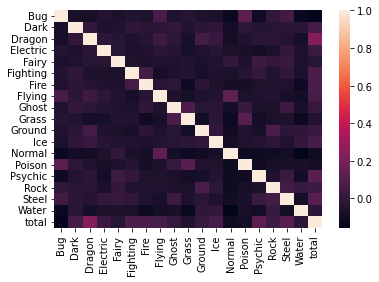

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns 
import statistics as stats

corr_matrix = pokemon_num.corr()
sns.heatmap(corr_matrix, annot=False)
plt.show()


In [35]:
corr_matrix

,Bug,Dark,Dragon,Electric,Fairy,Fighting,Fire,Flying,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water,total
Bug,1.000000,-0.082062,-0.081200,-0.045111,-0.072148,-0.048645,-0.060536,0.064571,-0.058915,-0.034430,-0.063544,-0.070229,-0.120219,0.121210,-0.111968,-0.003706,0.047178,-0.123983,-0.145781
Dark,-0.082062,1.000000,-0.003963,-0.067375,-0.059864,-0.007791,-0.020368,-0.022164,0.001484,-0.048339,-0.023480,-0.010163,-0.099751,-0.018227,-0.044327,-0.033493,-0.023978,-0.028548,0.056154
Dragon,-0.081200,-0.003963,1.000000,-0.024000,-0.035541,-0.068775,-0.038069,0.026237,-0.019410,-0.078818,0.052430,0.015173,-0.098702,-0.055525,-0.026557,-0.032360,-0.044417,-0.083285,0.229705
Electric,-0.045111,-0.067375,-0.024000,1.000000,-0.035541,-0.068775,-0.057104,-0.020407,-0.041592,-0.078818,-0.059420,-0.033382,-0.067737,-0.074838,-0.091928,-0.072188,-0.001346,-0.069109,0.020971
Fairy,-0.072148,-0.059864,-0.035541,-0.035541,1.000000,-0.061108,-0.067651,-0.052669,-0.056665,-0.048756,-0.069360,-0.051232,-0.001720,-0.066495,0.027227,0.002212,0.013155,-0.067703,-0.036698
Fighting,-0.048645,-0.007791,-0.068775,-0.068775,-0.061108,1.000000,0.051130,-0.086119,-0.065792,-0.051171,-0.080531,-0.059483,-0.071687,-0.039613,0.000596,-0.055090,-0.005161,-0.073778,0.077786
Fire,-0.060536,-0.020368,-0.038069,-0.057104,-0.067651,0.051130,1.000000,-0.028855,-0.013459,-0.108248,-0.022621,-0.065851,-0.085097,-0.085471,-0.061243,-0.064677,-0.056108,-0.114850,0.078726
Flying,0.064571,-0.022164,0.026237,-0.020407,-0.052669,-0.086119,-0.028855,1.000000,-0.061555,-0.081366,-0.060578,-0.049498,0.125506,-0.067950,-0.063872,-0.048221,-0.081400,-0.092030,0.059383
Ghost,-0.058915,0.001484,-0.019410,-0.041592,-0.056665,-0.065792,-0.013459,-0.061555,1.000000,0.075316,-0.035908,-0.029914,-0.094420,0.008736,-0.070947,-0.069057,0.026479,-0.077314,0.003641
Grass,-0.034430,-0.048339,-0.078818,-0.078818,-0.048756,-0.051171,-0.108248,-0.081366,0.075316,1.000000,-0.097033,-0.027476,-0.117156,0.110372,-0.094009,-0.072829,-0.061537,-0.126894,-0.052592


We see that all the correlations are pretty low and far from 1.0.
That means that the type alone cannot be an excellent indicator of the 'total' a pokemon van have.
However, let's go on and check which type has the highest correlation with 'Total'

In [36]:
total_corr_series = list(corr_matrix.loc['total'])
total_corr_series.pop()   # I remove the last element, which is the correlation of total with itsel (has to be 1)
max_corr = max(total_corr_series) # I then search for the highest correlation in the list
types_list = list(corr_matrix.columns) # Get the list of pokemon types from the correlation matrix

The index of the max_corr in total_corr_series will be the same as the matching pokemon type in the columns
which leads us to the conclusion

In [40]:
print('The Pokemon type with the highest correlation to Total is :', types_list[total_corr_series.index(max_corr)])

The Pokemon type with the highest correlation to Total is : Dragon


# BONUS

#### Say now you can choose both Type 1 and Type 2 of the pokemon. In order to receive the best pokemon, which types will you choose?

We need to find the combo_type that will give us the highest pair of correlations with Total

In [39]:
pokemon['combo_type'].value_counts()

Normal            61
Water             59
Psychic           38
Grass             33
Fire              28
                  ..
Electric-Grass     1
Steel-Dragon       1
Fire-Steel         1
Psychic-Fire       1
Fire-Water         1
Name: combo_type, Length: 154, dtype: int64

In [42]:
pokemon_short = pokemon[['name','type_1','type_2','combo_type']]
pokemon_short

,name,type_1,type_2,combo_type
0,Bulbasaur,Grass,Poison,Grass-Poison
1,Ivysaur,Grass,Poison,Grass-Poison
2,Venusaur,Grass,Poison,Grass-Poison
3,Mega Venusaur,Grass,Poison,Grass-Poison
4,Charmander,Fire,NaN,Fire
...,...,...,...,...
795,Diancie,Rock,Fairy,Rock-Fairy
796,Mega Diancie,Rock,Fairy,Rock-Fairy
797,HoopaHoopa Confined,Psychic,Ghost,Psychic-Ghost
798,HoopaHoopa Unbound,Psychic,Dark,Psychic-Dark


In [44]:
def total_corr(row):
    if row['combo_type'] == row['type_1']:
        total_correlation = total_corr_series[types_list.index(row['type_1'])]
    else:
        total_correlation = total_corr_series[types_list.index(row['type_1'])] + total_corr_series[types_list.index(row['type_2'])]
    return total_correlation

In [46]:
pokemon_short['total_correlation'] = pokemon_short.apply(total_corr,axis=1)
pokemon_short

C:\Users\ebour\AppData\Local\Temp/ipykernel_31636/849101397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemon_short['total_correlation'] = pokemon_short.apply(total_corr,axis=1)


,name,type_1,type_2,combo_type,total_correlation
0,Bulbasaur,Grass,Poison,Grass-Poison,-0.143033
1,Ivysaur,Grass,Poison,Grass-Poison,-0.143033
2,Venusaur,Grass,Poison,Grass-Poison,-0.143033
3,Mega Venusaur,Grass,Poison,Grass-Poison,-0.143033
4,Charmander,Fire,NaN,Fire,0.078726
...,...,...,...,...,...
795,Diancie,Rock,Fairy,Rock-Fairy,-0.003967
796,Mega Diancie,Rock,Fairy,Rock-Fairy,-0.003967
797,HoopaHoopa Confined,Psychic,Ghost,Psychic-Ghost,0.128329
798,HoopaHoopa Unbound,Psychic,Dark,Psychic-Dark,0.180842


In [47]:
max_corr_combo = pokemon_short['total_correlation'].max()
max_corr_combo

0.3543927414292311

In [49]:
best_pokemons = pokemon_short[pokemon_short['total_correlation'] == max_corr_combo]
best_pokemons

,name,type_1,type_2,combo_type,total_correlation
417,Latias,Dragon,Psychic,Dragon-Psychic,0.354393
418,Mega Latias,Dragon,Psychic,Dragon-Psychic,0.354393
419,Latios,Dragon,Psychic,Dragon-Psychic,0.354393
420,Mega Latios,Dragon,Psychic,Dragon-Psychic,0.354393


In [52]:
best_combo_type = list(best_pokemons['combo_type'].unique())

In [54]:
display('The best combo-types are in the list :',best_combo_type)

'The best combo-types are in the list :'

['Dragon-Psychic']